In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
def criar_grafo(sequencia):
    G = nx.DiGraph()

    # Adiciona nós e arestas
    for i in range(len(sequencia)-1):
        evento_atual = sequencia[i]
        prox_evento = sequencia[i+1]

        # Verifica se a aresta já existe
        if G.has_edge(evento_atual, prox_evento):
            G[evento_atual][prox_evento]['weight'] += 1
        else:
            G.add_edge(evento_atual, prox_evento, weight=1)

    return G

def espessura_arestas(G):
    pesos = [d['weight'] for _, _, d in G.edges(data=True)]
    return pesos

def plotar_grafo(G):
    pos = nx.spring_layout(G, seed=42)  # Define uma disposição inicial para os nós
    edge_labels = nx.get_edge_attributes(G, 'weight')

    nx.draw(G, pos, with_labels=True, node_size=800, node_color='skyblue', font_size=10, font_color='black',
            width=espessura_arestas(G), edge_color='gray', edge_cmap=plt.cm.Blues, font_weight='bold')

    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.show()

In [5]:
import math

df = pd.read_csv('../data/crawler/unified-events-statistics.csv')
df = df.drop(['event1time','event2time','event3time','event4time','event5time','event6time','event7time','event8time','event9time','event10time','event11time','event12time','event13time','event14time','event15time','event16time','event17time','event18time','event19time','event20time','event21time','event22time','event23time','event24time','event25time','event26time','event27time','event28time','event29time','event30time','event31time','event32time','event33time','event34time','event35time','event36time','event37time','event38time','event39time','event40time','event41time','event42time','event43time','event44time','event45time','blueTopGP','blueTopWR','blueTopKDA','blueJungleGP','blueJungleWR','blueJungleKDA','blueMidGP','blueMidWR','blueMidKDA','blueADCGP','blueADCWR','blueADCKDA','blueSupportGP','blueSupportWR','blueSupportKDA','redTopGP','redTopWR','redTopKDA','redJungleGP','redJungleWR','redJungleKDA','redMidGP','redMidWR','redMidKDA','redAdcGP','redAdcWR','redAdcKDA','redSupportGP','redSupportWR','redSupportKDA','result','qtd_eventos','duracao_min','golId','game'], axis=1)
df = df.fillna(0)
lista_eventos = df.values.tolist()

list_eventos_limpa = [[elemento for elemento in sublista if elemento != 0] for sublista in lista_eventos]

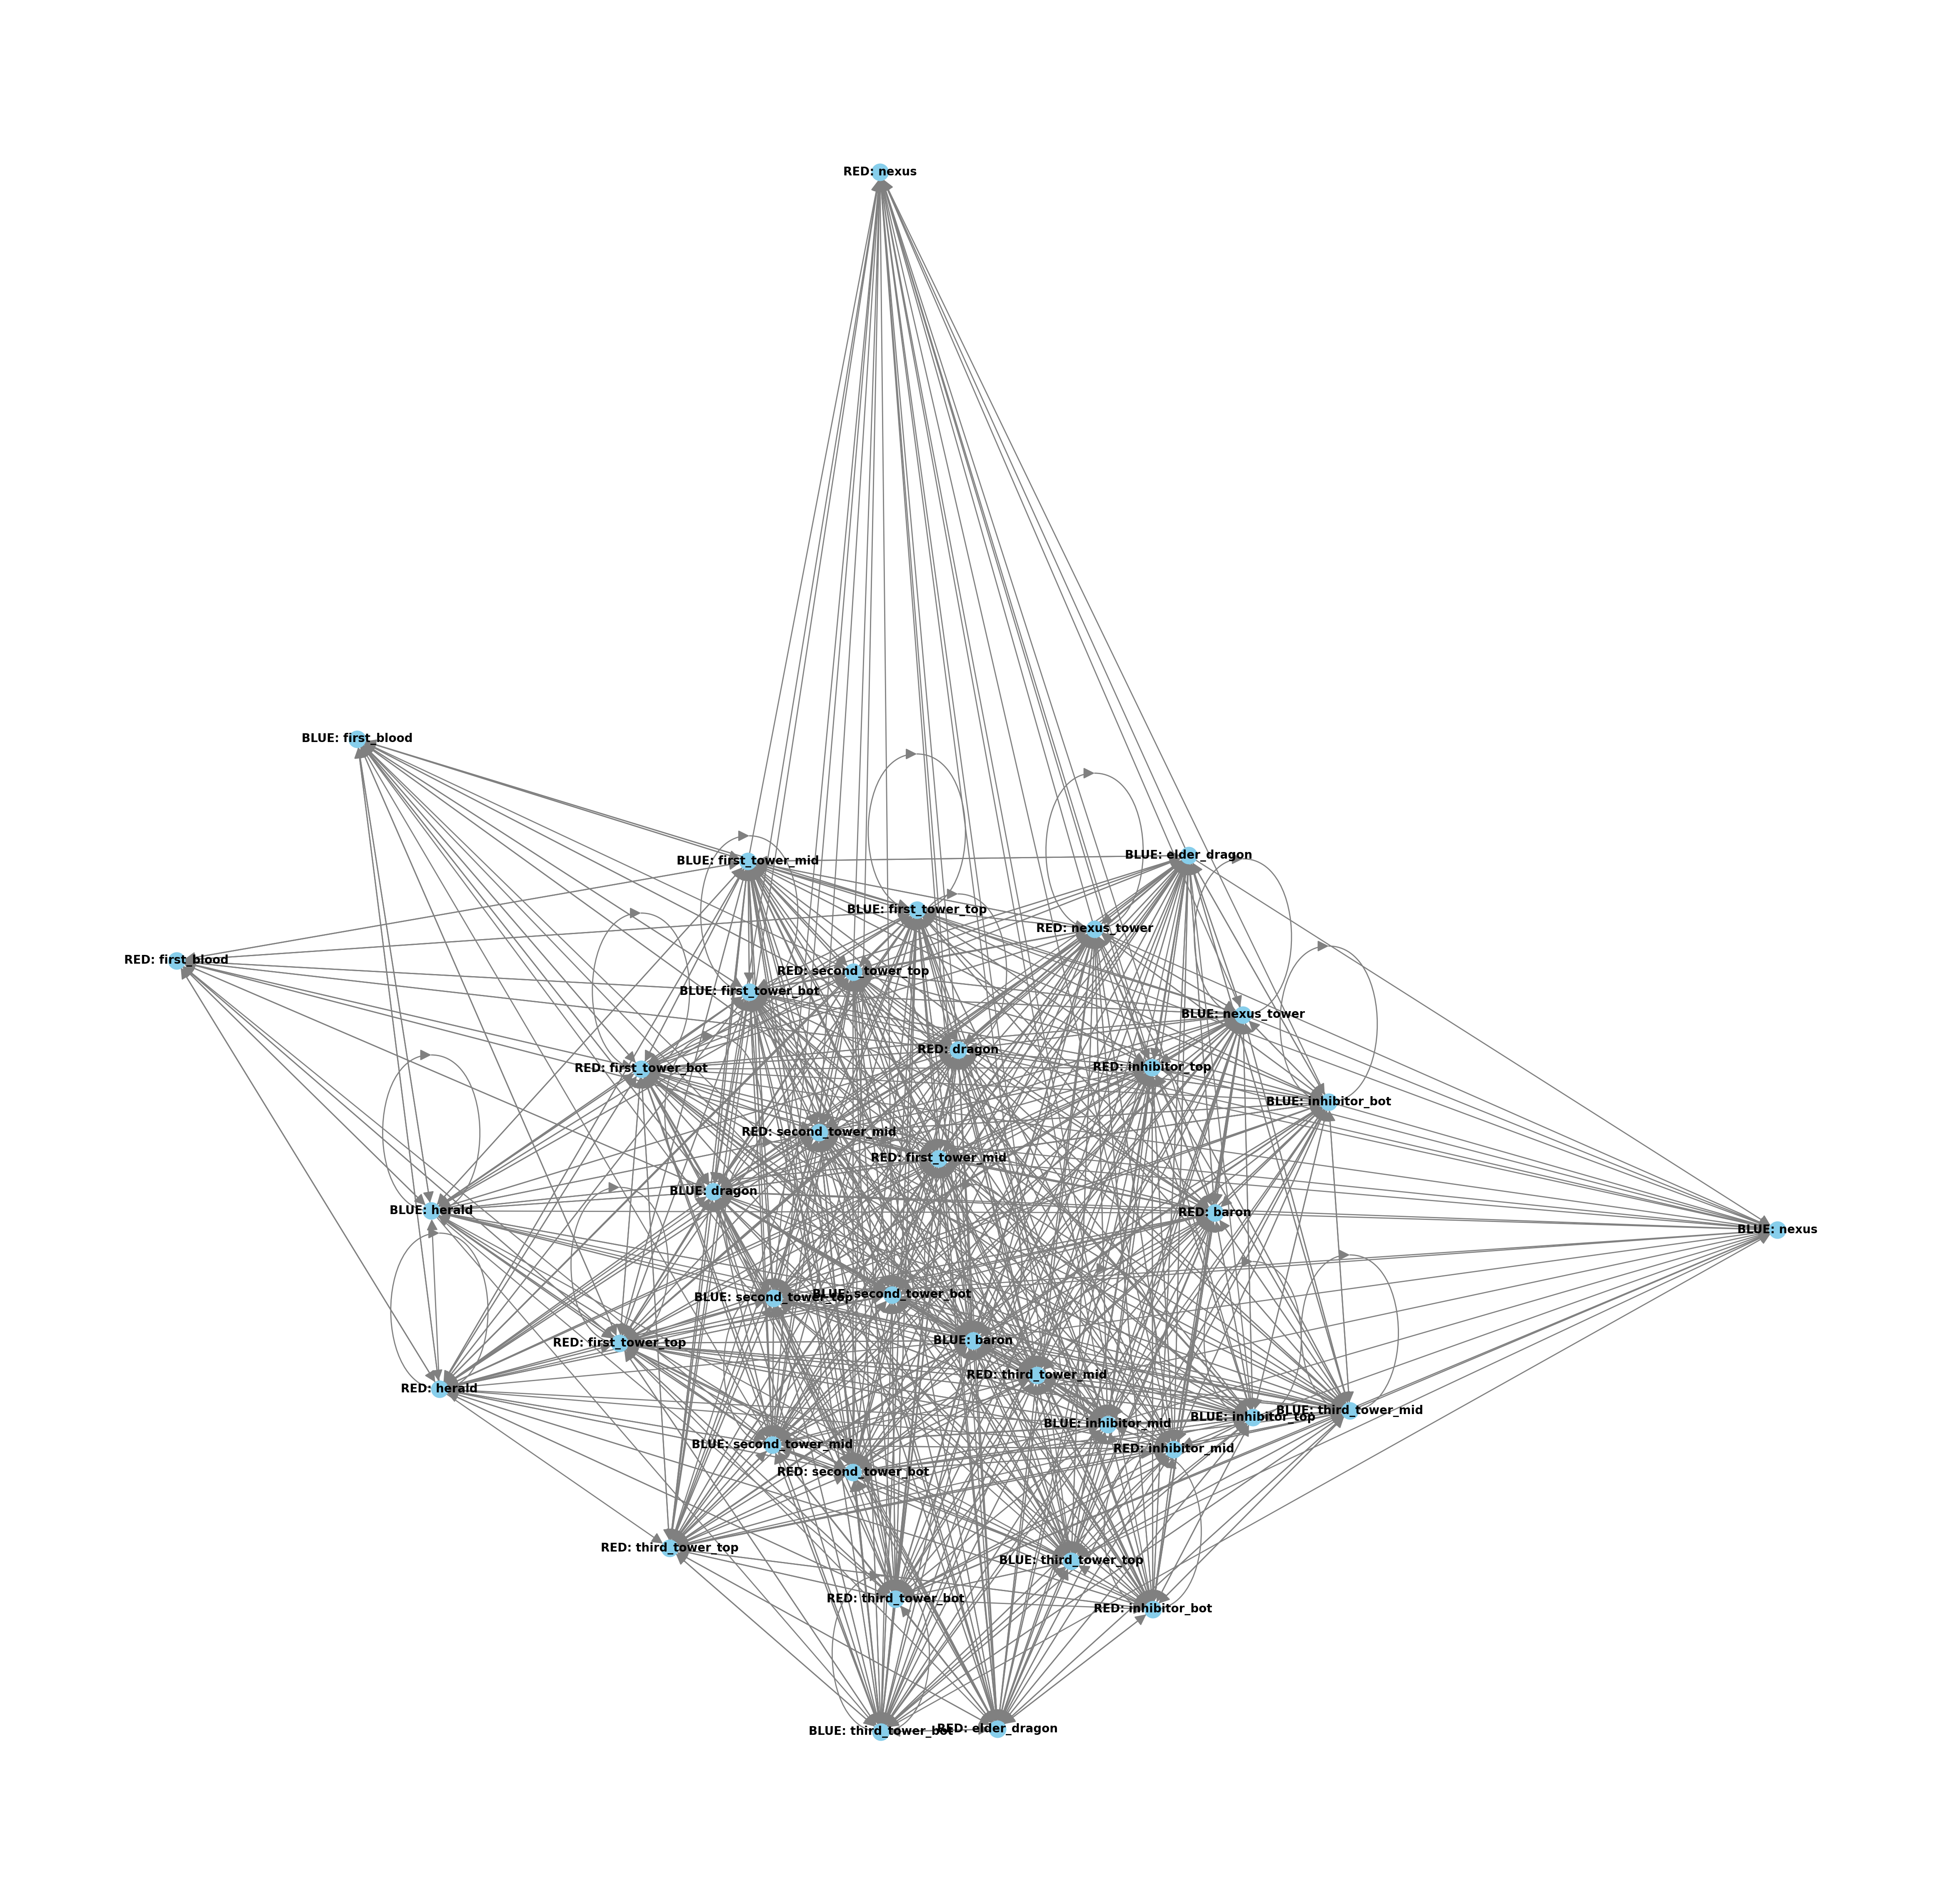

In [6]:
# Criar um grafo direcionado
G = nx.DiGraph()

# Iterar sobre as sequências
for sequence in list_eventos_limpa:
    for i in range(len(sequence) - 1):
        event_current = sequence[i]
        next_event = sequence[i + 1]
        G.add_edge(event_current, next_event)

# Ajustar o layout para espaçar os nós
pos = nx.spring_layout(G, k=1)  # k é uma constante de escala que controla a distância entre os nós

# Ajustar o tamanho da imagem para ter pelo menos 1000 pixels de largura e altura
fig, ax = plt.subplots(figsize=(30, 30), dpi=200)  # 1000 pixels / 100 dpi = 10 polegadas

# Desenhar o grafo
nx.draw(G, pos, with_labels=True, node_size=200, node_color='skyblue', font_size=10, font_color='black',
        width=1, edge_color='gray', font_weight='bold', arrowsize=20)

# Exibir o grafo
plt.show()

In [7]:
from collections import defaultdict

G = nx.DiGraph()

transicoes = defaultdict(lambda: defaultdict(int))

for sequence in list_eventos_limpa:
    for i in range(len(sequence) - 1):
        event_current = sequence[i]
        next_event = sequence[i + 1]
        transicoes[event_current][next_event] += 1

# Calcular as probabilidades
probabilidades = {}
for event, next_events in transicoes.items():
    total_transicoes = sum(next_events.values())
    probabilidades[event] = {next_event: count / total_transicoes for next_event, count in next_events.items()}

# Exibir as probabilidades
for event, next_events in probabilidades.items():
    for next_event, probabilidade in next_events.items():
        if probabilidade > 0:
            G.add_edge(event, next_event, weight=probabilidade)
            print(f"A probabilidade de {next_event} dado {event} é {probabilidade:.2f}")

A probabilidade de BLUE: herald dado RED: first_blood é 0.19
A probabilidade de BLUE: first_tower_bot dado RED: first_blood é 0.01
A probabilidade de RED: herald dado RED: first_blood é 0.20
A probabilidade de RED: dragon dado RED: first_blood é 0.37
A probabilidade de BLUE: dragon dado RED: first_blood é 0.21
A probabilidade de BLUE: first_tower_mid dado RED: first_blood é 0.00
A probabilidade de RED: first_tower_bot dado RED: first_blood é 0.01
A probabilidade de BLUE: first_tower_top dado RED: first_blood é 0.01
A probabilidade de RED: first_tower_mid dado RED: first_blood é 0.00
A probabilidade de RED: first_tower_top dado RED: first_blood é 0.00
A probabilidade de BLUE: second_tower_mid dado RED: first_blood é 0.00
A probabilidade de RED: dragon dado BLUE: herald é 0.26
A probabilidade de RED: first_tower_bot dado BLUE: herald é 0.09
A probabilidade de RED: first_blood dado BLUE: herald é 0.02
A probabilidade de RED: first_tower_mid dado BLUE: herald é 0.02
A probabilidade de BLUE

In [8]:
# 3. Calcular o PageRank
page_rank = nx.pagerank(G)

# 4. Identificar os Eventos mais Importantes
eventos_ordenados = sorted(page_rank.items(), key=lambda x: x[1], reverse=True)
print("Eventos mais importantes:")
for evento, pontuacao in eventos_ordenados:
    print(f"{evento}: {pontuacao}")

Eventos mais importantes:
RED: dragon: 0.06905484814873876
BLUE: dragon: 0.06672329064905323
BLUE: nexus_tower: 0.056872818190971716
RED: nexus_tower: 0.05487972078745535
BLUE: herald: 0.033480160195055994
BLUE: first_tower_bot: 0.03066382636176515
BLUE: first_tower_top: 0.030636492483571434
RED: first_tower_top: 0.03045728788116258
RED: first_tower_bot: 0.030032197286590435
RED: baron: 0.029684082438816956
BLUE: nexus: 0.029191033248667182
BLUE: first_tower_mid: 0.029120019877160543
BLUE: baron: 0.029016947194372276
RED: nexus: 0.028469732079772547
RED: first_tower_mid: 0.027644383168298724
BLUE: inhibitor_mid: 0.02628877388880132
BLUE: second_tower_mid: 0.02608113772939684
RED: herald: 0.02586228299601228
RED: inhibitor_mid: 0.025018933931036304
RED: second_tower_mid: 0.024457250595532228
BLUE: third_tower_mid: 0.023798524618698816
BLUE: second_tower_bot: 0.023336995740567384
RED: second_tower_bot: 0.022457532399954287
RED: third_tower_mid: 0.0220195430145666
BLUE: second_tower_top: 

In [9]:
# 3. Análise das Sequências
eventos_apos_final1 = []
eventos_apos_final2 = []

for sequencia in list_eventos_limpa:
    if sequencia[-1] == 'BLUE: nexus':
        eventos_apos_final1.append(sequencia[-2])
    elif sequencia[-1] == 'RED: nexus':
        eventos_apos_final2.append(sequencia[-2])

# 4. Contagem da Frequência dos Eventos Após os Finais
from collections import Counter

frequencia_final1 = Counter(eventos_apos_final1)
frequencia_final2 = Counter(eventos_apos_final2)

# 5. Classificação dos Eventos por Frequência
eventos_ordenados_final1 = frequencia_final1.most_common()
eventos_ordenados_final2 = frequencia_final2.most_common()

# 6. Seleção dos 5 Eventos Mais Impactantes
eventos_final1 = [evento for evento, _ in eventos_ordenados_final1[:5]]
eventos_final2 = [evento for evento, _ in eventos_ordenados_final2[:5]]

print("Os 5 eventos mais impactantes para o time azul vencer são:", eventos_final1)
print("Os 5 eventos mais impactantes para o time vermelho vencer são:", eventos_final2)

Os 5 eventos mais impactantes para o time azul vencer são: ['BLUE: nexus_tower', 'BLUE: inhibitor_mid', 'BLUE: inhibitor_bot', 'BLUE: third_tower_mid', 'BLUE: inhibitor_top']
Os 5 eventos mais impactantes para o time vermelho vencer são: ['RED: nexus_tower', 'RED: inhibitor_mid', 'RED: inhibitor_bot', 'RED: inhibitor_top', 'RED: third_tower_top']


In [10]:
events_dict = {
    'BLUE: first_blood': 18,
    'BLUE: dragon': 37,
    'BLUE: herald': 2,
    'BLUE: first_tower_top': 3,
    'BLUE: first_tower_mid': 4,
    'BLUE: first_tower_bot': 5,
    'BLUE: second_tower_top': 6,
    'BLUE: second_tower_mid': 7,
    'BLUE: second_tower_bot': 8,
    'BLUE: third_tower_top': 9,
    'BLUE: third_tower_mid': 10,
    'BLUE: third_tower_bot': 11,
    'BLUE: inhibitor_top': 12,
    'BLUE: inhibitor_mid': 13,
    'BLUE: inhibitor_bot': 14,
    'BLUE: baron': 15,
    'BLUE: elder_dragon': 16,
    'BLUE: nexus_tower': 17,
    'BLUE: nexus': 1,
    'RED: first_blood': 19,
    'RED: dragon': 20,
    'RED: herald': 21,
    'RED: first_tower_top': 22,
    'RED: first_tower_mid': 23,
    'RED: first_tower_bot': 24,
    'RED: second_tower_top': 25,
    'RED: second_tower_mid': 26,
    'RED: second_tower_bot': 27,
    'RED: third_tower_top': 28,
    'RED: third_tower_mid': 29,
    'RED: third_tower_bot': 30,
    'RED: inhibitor_top': 31,
    'RED: inhibitor_mid': 32,
    'RED: inhibitor_bot': 33,
    'RED: baron': 34,
    'RED: elder_dragon': 35,
    'RED: nexus_tower': 36,
    'RED: nexus': 0
}

In [11]:
for game in list_eventos_limpa:
    for i, s in enumerate(game):
        if s in events_dict:
            game[i] = events_dict.get(s)

list_eventos_limpa

[[19,
  2,
  20,
  5,
  20,
  2,
  24,
  4,
  22,
  20,
  23,
  37,
  34,
  26,
  29,
  32,
  20,
  25,
  34,
  3,
  27,
  30,
  33,
  32,
  28,
  31,
  36,
  36,
  0],
 [2,
  19,
  5,
  20,
  4,
  22,
  21,
  23,
  24,
  3,
  27,
  20,
  34,
  25,
  8,
  26,
  6,
  37,
  7,
  34,
  37,
  30,
  33,
  29,
  32,
  37,
  11,
  15,
  20,
  14,
  20,
  32,
  36,
  36,
  0],
 [18,
  37,
  21,
  5,
  37,
  21,
  3,
  20,
  23,
  22,
  37,
  8,
  4,
  15,
  37,
  7,
  6,
  24,
  27,
  16,
  34,
  9,
  12,
  10,
  13,
  17,
  17,
  1],
 [19,
  21,
  37,
  2,
  24,
  37,
  4,
  3,
  7,
  37,
  37,
  15,
  5,
  8,
  11,
  14,
  17,
  10,
  13,
  6,
  9,
  17,
  12,
  1],
 [19,
  21,
  37,
  22,
  37,
  24,
  27,
  2,
  23,
  5,
  20,
  26,
  34,
  37,
  25,
  20,
  34,
  28,
  31,
  30,
  33,
  4,
  7,
  20,
  29,
  32,
  36,
  36,
  0],
 [20, 21, 19, 20, 24, 21, 3, 23, 20, 22, 5, 25, 20, 34, 26, 29, 32, 36, 36, 0],
 [19, 37, 2, 37, 21, 37, 5, 23, 3, 4, 20, 8, 22, 37, 7, 15, 10, 13, 17, 17, 1],
 

In [12]:
menor_comprimento = min(len(sublista) for sublista in list_eventos_limpa)

print(f"O menor comprimento das sublistas é: {menor_comprimento}")

O menor comprimento das sublistas é: 11


In [20]:
def encontrar_listas_repetidas(lista_de_listas):
    contagem = {}
    
    for lista in lista_de_listas:
        # Converta a lista em uma tupla para usar como chave
        lista_tupla = tuple(lista)
        
        # Atualize a contagem para essa lista
        if lista_tupla in contagem:
            contagem[lista_tupla] += 1
        else:
            contagem[lista_tupla] = 1
    
    # Encontre as listas que se repetem
    listas_repetidas = [list(lista) for lista, freq in contagem.items() if freq > 1]
    
    return listas_repetidas

# Exemplo de uso
listas_repetidas = encontrar_listas_repetidas(list_eventos_limpa)

print("Listas repetidas:")
for lista in listas_repetidas:
    print(lista)

print("Nenhuma sequência de eventos é igual. Isso demonstra a alta imprevisibilidade das partidas.")


Listas Repetidas:
Nenhuma sequência de eventos é igual. Isso demonstra a alta imprevisibilidade das partidas.


In [14]:
# Formatando dados de forma que X tenha os primeiros 10 eventos da partida e Y o resultado da partida

X = []  # Lista para armazenar as características
Y = []  # Lista para armazenar os rótulos

for sequencia in list_eventos_limpa:
    # Verifique se a sequência tem pelo menos 11 eventos
    if len(sequencia) >= 11:
        X.append(sequencia[:10])  # Os 10 eventos anteriores
        Y.append(sequencia[-1])

In [15]:
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

# Convertendo para numpy array
X = np.array(X)
Y = np.array(Y)

# Construção do modelo CNN
model = Sequential([
    Embedding(input_dim=38, output_dim=50, input_length=10),  # input_dim é o tamanho do vocabulário (número de eventos diferentes)
    Conv1D(64, 3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilação do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC','MeanSquaredError','Precision'])

# Treinamento do modelo
model.fit(X, Y, epochs=20, batch_size=16, validation_split=0.2)

# Agora você pode usar o modelo treinado para fazer previsões


Epoch 1/20
301/301 [==============================] - 2s 4ms/step - loss: 0.5191 - accuracy: 0.7481 - auc: 0.8192 - mean_squared_error: 0.2298 - precision: 0.7645 - val_loss: 0.4561 - val_accuracy: 0.7872 - val_auc: 0.8701 - val_mean_squared_error: 0.1493 - val_precision: 0.7715
Epoch 2/20
301/301 [==============================] - 1s 3ms/step - loss: 0.4564 - accuracy: 0.7811 - auc: 0.8601 - mean_squared_error: 0.2053 - precision: 0.7846 - val_loss: 0.4523 - val_accuracy: 0.7864 - val_auc: 0.8690 - val_mean_squared_error: 0.1472 - val_precision: 0.7920
Epoch 3/20
301/301 [==============================] - 1s 3ms/step - loss: 0.4436 - accuracy: 0.7818 - auc: 0.8659 - mean_squared_error: 0.2016 - precision: 0.7813 - val_loss: 0.4596 - val_accuracy: 0.7847 - val_auc: 0.8723 - val_mean_squared_error: 0.1499 - val_precision: 0.7641
Epoch 4/20
301/301 [==============================] - 1s 3ms/step - loss: 0.4313 - accuracy: 0.7884 - auc: 0.8700 - mean_squared_error: 0.1997 - precision: 0.79

In [16]:
model.predict([[19, 2, 20, 5, 20, 2, 24, 4, 22, 20]])
# Probabilidade de 97% para a classificação 0 (acertou)

1/1 [==============================] - 0s 271ms/step


array([[0.0080908]], dtype=float32)